#dịch rìa

+ Cho một mảng hai chiều các số nguyên. Hãy thực hiện dịch chuyển các phần tử ở rìa của mảng. Trong đó rìa thứ i sẽ dịch chuyển theo chiều kim đồng hồ nếu i là số chẵn và ngược chiều kim đồng hồ nếu i là số lẻ.

+ Rìa thứ i của mảng được định nghĩa như sau:

+ Rìa thứ 0 là hợp của dòng trên cùng, dòng cuối cùng, cột ngoài cùng bên trái và cột ngoài cùng bên phải.
+ Nếu ta xóa rìa thứ 0 của mảng ban đầu ta sẽ thu được một mảng mới. Rìa thứ 0 của mảng mới chính là rìa thứ 1 của mảng ban đầu.
Tương tự cho rìa thứ 2 và rìa thứ 3

**INPUT**

+ Dòng đầu tiên chứa hai số r và c là số dòng và số cột của mảng.

+ r dòng tiếp theo, mỗi dòng chứa c số nguyên. Đây là các phần tử trong mảng 2 chiều

**OUTPUT**

+ Mảng sau khi dịch chuyển tất cả các rìa

**VÍ DỤ**

| Input | Output |
|-------|--------|
| 5 4   | 5 1 2 3 |
| 1 2 3 4 | 9 7 11 4 |
| 5 6 7 8 | 13 6 15 8 |
| 9 10 11 12 | 17 10 14 12 |
| 13 14 15 16 | 18 19 20 16 |
| 17 18 19 20 |        |
|-------|---------|
| 8 1   | 245    |
| 238   | 238    |
| 239   | 239    |
| 240   | 240    |
| 241   | 241    |
| 242   | 242    |
| 243   | 243    |
| 244   | 244    |
| 245   |        |


In [ ]:
def removeBorders(matrix, depth):
    copy_matrix = matrix  # Sao chép ma trận đầu vào để không ảnh hưởng đến ma trận gốc
    top_row, right_column, bottom_row, left_column = [], [], [], []  # Khởi tạo các biến để lưu trữ hàng và cột của viền
    temp = []  # Biến tạm để lưu trữ giá trị của các hàng và cột viền

    # Nếu ma trận rỗng, trả về ma trận ban đầu
    if not any(copy_matrix):
        return copy_matrix

    # Lấy hàng đầu tiên nếu ma trận không rỗng
    if any(copy_matrix):
        top_row = copy_matrix.pop(0)

    # Lấy hàng cuối cùng nếu ma trận không rỗng
    if any(copy_matrix):
        bottom_row = copy_matrix.pop(-1)

    # Lấy cột cuối cùng nếu ma trận không rỗng
    if any(copy_matrix):
        right_column = [row.pop(-1) for row in copy_matrix]

    # Lấy cột đầu tiên nếu ma trận không rỗng
    if any(copy_matrix):
        left_column = [row.pop(0) for row in copy_matrix]

    # Đệ quy gọi hàm removeBorders để loại bỏ viền cho ma trận bên trong
    copy_matrix = removeBorders(copy_matrix, depth + 1)

    # Sắp xếp lại các giá trị của các hàng và cột viền vào biến temp theo thứ tự cần thiết
    if any(top_row):
        temp += top_row
    if any(right_column):
        temp += right_column
    if any(bottom_row):
        temp += bottom_row[::-1]
    if any(left_column):
        temp += left_column[::-1]

    # Sắp xếp lại temp sao cho ma trận mới không có viền
    if depth % 2 == 0:
        temp = [temp.pop(-1)] + temp
    else:
        temp = temp + [temp.pop(0)]

    # Tính số cột và số hàng mới của ma trận đã loại bỏ viền
    column_count = max(len(top_row), len(bottom_row))
    row_count = max(len(left_column), len(right_column))

    # Cập nhật các hàng và cột mới cho ma trận đã loại bỏ viền
    top_row = temp[:column_count]
    temp = temp[column_count:]
    right_column = temp[:row_count]
    temp = temp[row_count:]
    bottom_row = temp[:column_count]
    bottom_row = bottom_row[::-1]
    temp = temp[column_count:]
    left_column = temp[::-1]

    # Thêm các giá trị đã loại bỏ vào ma trận mới
    for i in range(row_count):
        if any(left_column):
            copy_matrix[i].insert(0, left_column[i])
        if any(right_column):
            copy_matrix[i].insert(len(copy_matrix[i]), right_column[i])
    if any(top_row):
        copy_matrix.insert(0, top_row)
    if any(bottom_row):
        copy_matrix.insert(len(copy_matrix), bottom_row)

    # Trả về ma trận đã loại bỏ viền
    return copy_matrix

row, col = map(int,input().split())
matrix = []
for _ in range(row):
          var = list(map(int, input().split()))
          matrix.append(var)
matrix_after_change = removeBorders(matrix,0)
for row in matrix_after_change:
    for val in row:
        print(val, end = " ")
    print()

#Đối xứng dọc

+ Viết hàm đảo mảng 2 chiều thành mảng đối xứng của nó theo trục ngang

**INPUT**

+ Dòng đầu tiên chứa hai số r và c là số dòng và số cột của mảng, mỗi số không quá 1000.

+ r dòng tiếp theo, mỗi dòng chứa c số nguyên. Đây là các phần tử trong mảng 2 chiều

**OUTPUT**

+ Mảng sau khi đảo

**VÍ DỤ**

| Input                  | Output                 |
|------------------------|------------------------|
| 2 5                    | 25363 30304 18436 13788 10275 |
| 12042 21050 24105 30563 12921 | 12042 21050 24105 30563 12921 |
| 25363 30304 18436 13788 10275 | 25363 30304 18436 13788 10275 |
|------------------------|------------------------|
| 5 5                    |                         |
| 28913 26846 85 19649 8524 |  18223 27172 2671 101 2170 |
| 7970 31692 11666 2213 6747 | 24997 18366 18071 8766 20104 |
| 22640 18740 30793 9860 15977 | 22640 18740 30793 9860 15977 |
| 24997 18366 18071 8766 20104 | 7970 31692 11666 2213 6747 |
| 18223 27172 2671 101 2170 |28913 26846 85 19649 8524 |




In [ ]:
def dao_n_dong(arr, n):
    if n <= len(arr) // 2:
        for i in range(n):
            arr[i], arr[-(i + 1)] = arr[-(i + 1)], arr[i]

arr = []

a,b = map(int,input().split())
for _ in range(a):
   row = list(map(int,input().split()))
   arr.append(row)
dao_n_dong(arr,int(a/2))

for hang in arr:
     print(*hang)

#mảng lề phải

+ Bình đang làm bài tập mảng 2 chiều nâng rất rất cao. Bình cần xuất mảng ra màn hình để quan sát. Tuy nhiên do các số nguyên trong mảng độ dài khác nhau nên khi xuất ra nhìn rất lộn xộn, không biết được số nào ở cột nào. Bạn hãy viết giúp Bình hàm xuất mảng một cách ngay ngắn.

**INPUT**
+ Dòng đầu tiên chứa hai số r và c là số dòng và số cột của mảng, mỗi số không quá 1000.

+ r dòng tiếp theo, mỗi dòng chứa c số nguyên. Đây là các phần tử trong mảng 2 chiều

**OUTPUT**
+ Mảng 2 chiều được canh lề phải ở các cột. Tức là chữ số cuối cùng của các cột được viết thẳng hàng với nhau. Các chỗ trống được lấp đầy bằng ký tự khoảng trắng

+ Lưu ý là đê đảm bảo chính xác ở cuối mỗi dòng của ma trận chỉ được xuất ký tự xuống dòng, không được xuất khoảng trắng thừa.

**VÍ DỤ**

| Input | Output |
|-------|--------|
| 3 3   |        |
| 593795850 925527 97481109 | 593795850 925527 97481109 |
| 8190 9258 2323 |    8190   9258   2323 |
| -8328541 62240 70544569 | -8328541 62240 70544569 |
| 5 5   |        |
| 28913 26846 85 19649 8524 | 28913 26846   85 19649  8524 |
| 7970 31692 11666 2213 6747 |  7970 31692 11666  2213  6747 |
| 22640 18740 30793 9860 15977 | 22640 18740 30793  9860 15977 |
| 24997 18366 18071 8766 20104 | 24997 18366 18071  8766 20104 |
| 18223 27172 2671 101 2170 | 18223 27172  2671   101  2170 |


In [ ]:
a,b = map(int,input().split())
matrix = []
for _ in range(a):
   row = list(map(int,input().split()))
   row = [str(x) for x in row]
   matrix.append(row)

max_lengths = [0] * b
for row in matrix:
        for i, value in enumerate(row):
            max_lengths[i] = max(max_lengths[i], len(str(value)))

for i in range(a):
    for j in range(b):
        align = " " * (max_lengths[j] - len(matrix[i][j]))
        if j != b - 1:
            print(align + matrix[i][j], end = " ")
        else:
            print(align + matrix[i][j])

#chu vi đường biên

+ Sau bao năm trời code thuê cày mướn, cắc củm dành dụm Bình cũng thuê được nhà. Ngày đầu tiên về sơn lại nhà mới Bình lại làm rơi nguyên thùng sơn xuống sàn. Sơn chảy ra nền nhà thành một vũng to trải trên nhiều viên gạch, Bình lại ngứa nghề tự hỏi không biết ranh giới của vùng gạch bị dính sơn là bao nhiêu? Bạn hãy viết chương trình tính giúp bình, xem mỗi cạnh ô gạch có độ dài 1 đơn vị

**INPUT**

+ Dòng đầu tiên chứa hai số tự nhiên m và n là kích thước sàn nhà của Bình (đơn vị là ô gạch)

+ m dòng tiếp theo mỗi dòng chứa n số nguyên mang giá trị:

+ Số 0 đại diện cho ô gạch chưa dính sơn
+ Số 1 đại diện cho ô gạch đã bị dính sơn

**OUTPUT**

+ Độ dài ranh giới

**VÍ DỤ**
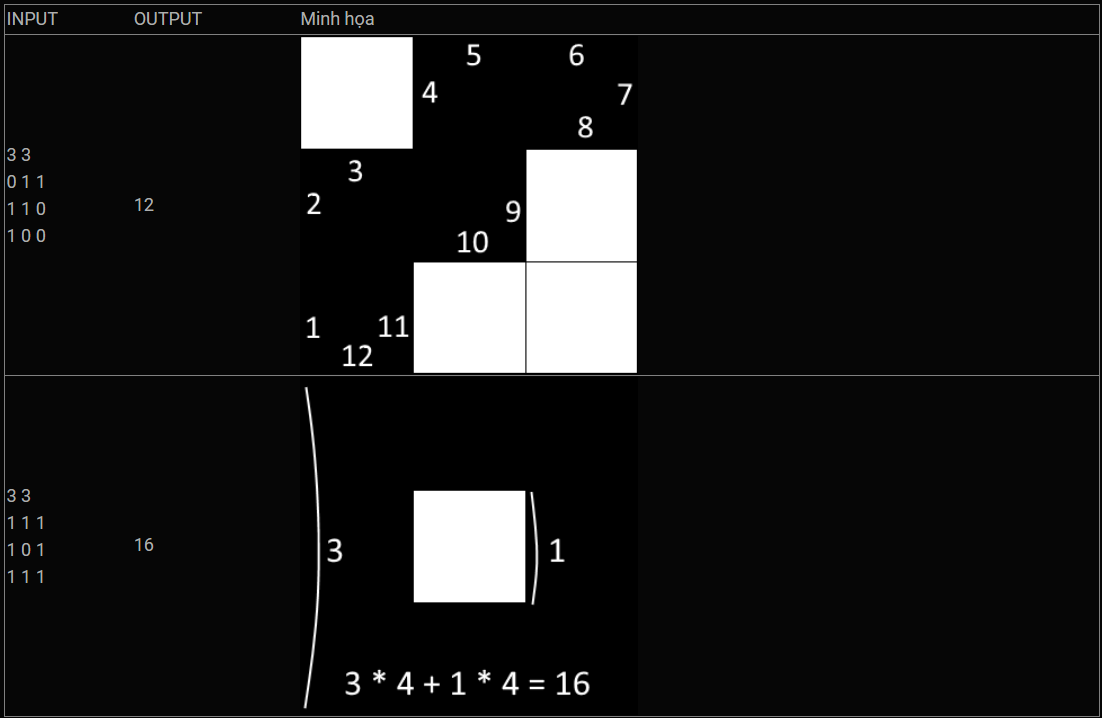

In [ ]:
def find_boundary(m, n, array):
    length = 0

    for i in range(m):
        for j in range(n):
            if array[i][j] == 1:
                if i == 0 or array[i - 1][j] == 0:
                    length += 1
                if i == m - 1 or array[i + 1][j] == 0:
                    length += 1
                if j == 0 or array[i][j - 1] == 0:
                    length += 1
                if j == n - 1 or array[i][j + 1] == 0:
                    length += 1

    return length
m, n = map(int, input().split())
array = []
for _ in range(m):
    row = list(map(int, input().split()))
    array.append(row)
print(find_boundary(m, n, array))

#Đếm sao

+ Khoa học tiên tiến đã nảy sinh ra yêu cầu dùng máy tính để tự động phân tích ảnh chụp của các siêu viễn vọng kính nhằm phát hiện ra những vì tinh tú mới. Lý do cho nhu cầu này đơn giản là vì trên trời triệu triệu vì sao, đếm hoài đếm mải con người bó tay rồi, không đếm nổi.

+ Các bạn hãy viết một chương trình nhận vào ảnh chụp của viễn vọng kính, ảnh này đã được xử lý đưa về dạng đen trắng. Điểm ảnh màu đen biểu diễn bằng ký tự # và điểm ảnh màu trắng biểu diễn bằng ký tự -

+ Vùng màu đen trên ảnh là vũ trụ bao la rộng lớn còn vùng màu trắng chính là các ngôi sao. Một ngôi sao tùy kích thước to nhỏ có thể chiếm một điểm ảnh hoặc là nhiều điểm ảnh liền kê nhau theo đường ngang hoặc đường dọc (không tính đường chéo).

**Input**

+ Mỗi test case bắt đầu bằng một hàng chứa hai con số 1≤m,n≤100. Sau đó là m hàng, mỗi hàng chứa n điểm ảnh

**Output**

+ Ứng với mỗi test case, xuất ra số ngôi sao có trên ảnh theo ví dụ sau:

**VÍ DỤ**

| Sample Input 1 | Sample Output 1 |
|-----------------|-----------------|
| 10 20           | Case 1: 4       |
|                 | Case 2: 1       |
| #################--- |                 |
| ##-###############-- |                 |
| #---################ |                 |
| ##-################# |                 |
| ########---######### |                 |
| #######-----######## |                 |
| ########---######### |                 |
| ##################-- |                 |
| #################--- |                 |
| ##################-# |                 |
| 3 10              |                 |
| #-########        |                 |
| ----------       |                 |
| #-########       |                 |


In [ ]:
hor = [0, 1, -1, 0]
ver = [1, 0, 0, -1]

def traverse(matrix, visited, i, j, m, n):
    if i < 0 or i >= m or j < 0 or j >= n or matrix[i][j] == 0 or (i, j) in visited:
        return 0

    visited.add((i, j))
    count = 1  # Biến đếm số lần thay đổi 1 cụm

    for k in range(4):
        if i + hor[k] >= 0 and i + hor[k] < m and j + ver[k] >= 0 and j + ver[k] < n and matrix[i + hor[k]][j + ver[k]] == 1:
            count += traverse(matrix, visited, i + hor[k], j + ver[k], m, n)

    return count

def recursive_traverse_and_replace(matrix):
    m = len(matrix)
    n = len(matrix[0])

    visited = set()  # Tạo một set để lưu các vị trí đã duyệt
    count = 0  # Biến đếm số lần thay đổi 1 cụm

    # Duyệt từng hàng của ma trận
    for i in range(m):
        for j in range(n):
            if matrix[i][j] == 1 and (i, j) not in visited:
                # Gọi hàm đệ quy để duyệt các "làn sóng" từ vị trí (i, j)
                cluster_size = traverse(matrix, visited, i, j, m, n)
                count += 1

    return count

def create_matrix():
    try:
        uin = input()
    except EOFError:
        quit()
    # Nhập m và n
    m, n = [int(num) for num in uin.split()]

    matrix = []
    for i in range(m):
        row = list(input().strip())
        matrix.append([1 if char == '-' else 0 for char in row])
    return matrix

# Tạo và in ma trận

cnt = 0
while (1):
    cnt += 1
    matrix = create_matrix()
    changes = recursive_traverse_and_replace(matrix)
    print('Case ' + str(cnt) + ': ' + str(changes))

#make array consecutive again

+ Cho một mảng trong đó mỗi số chỉ xuất hiện 1 lần, đếm xem cần phải chèn vào mảng ít nhất bao nhiêu phần tử để mảng chứa tất cả số nguyên trên một đoạn liên tục.

**INPUT**

+ Dòng đầu tiên chứa số n (n < 100000), là số lượng phần tử của mảng.

+ n dòng tiếp theo, mỗi dòng chứa một số nguyên, đây là các phần tử của mảng.

**OUTPUT**

+ Số phần tử tối thiểu cần thêm vào mảng để mảng chứa toàn bộ số tự nhiên liên tiếp và không chứa bất cứ số nào khác.

**VÍ DỤ**

|     Input     |   Output  |       Giải thích        |
|---------------|-----------|-------------------------|
| 4             |    3      | Cần thêm vào 4, 5 và 7  |
| 6             |           |                         |
| 2             |           |                         |
| 3             |           |                         |
| 8             |           |                         |
|---------------|-----------|-------------------------|
| 2             |    1      | Cần thêm vào số -2      |
| -1            |           |                         |
| -3            |           |                         |
|---------------|-----------|-------------------------|
| 2             |    3      | Cần thêm vào 0, 1 và 2  |
| -1            |           |                         |
| 3             |           |                         |


In [ ]:
def count_missing_numbers(arr):
    count = 0
    for i in range(len(arr) - 1):
        if arr[i] + 1 != arr[i+1]:
            count += arr[i+1] - arr[i] - 1
    return count



n = int(input())
arr = []
for _ in range(n):
   row = int(input())
   #row = list(map(int,input().split()))
   arr.append(row)

sorted_arr = sorted(arr)

# Đếm số lượng giá trị cần thêm vào để không có các số liền nhau
missing_count = count_missing_numbers(sorted_arr)

print(missing_count)

#con đò

+ Từ xa xưa, hình ảnh con đò bến nước đã đi vào trong thi ca và trong tâm tưởng dân tộc. Hình ảnh con đò ngày ngày đưa khách sang sông in đậm trong tâm trí nhiều người và đôi khi còn được dùng để so sánh với nghề dạy học.

+ Mở rộng hình ảnh của những con đò chính là những chiếc phà, không chỉ chở được khách mà còn chở được cả xe của khách sang sông. Phà là một loại tàu lớn, có 2 đầu y như nhau, xe chạy lên ở một đầu và chạy xuống ở đầu kia. Mỗi đầu của phà tương ứng với một bờ của con sông, phà luôn luôn cập đầu bên phải và bờ bên phải và ngược lại, không bao giờ đổi đầu nhằm tối ưu thời gian chuyên chơn.

+ Trên con sông kia có một chiếc phà dài l mét hàng ngày chở khách qua sông. Bỗng một hôm phà bị hư phải nằm sửa ở tả ngạn con sông, xe đến không qua được sông xếp thành hàng dài hai bên bờ bấm kèn inh ỏi nhức óc đinh tai. Một sinh viên UIT bị kẹt trong hàng xe dài đằng đẵng kia quyết định giết thời gian bằng cách viết một chương trình tính toán số lần phà sẽ phải chạy để đưa hết hàng xe đang đợi qua sông khi nó hoạt động trở lại. Hãy giúp bạn ấy.

**Input**

+ Mỗi test bắt đầu bằng hai con số nguyên 1≤l≤500 and 1≤m≤10000. Trong dó l là chiều dài của phà (tính bằng mét) và m là số lượng xe đang kẹt hai bên bờ. m dòng tiếp theo, đại diên cho các xe đang chờ phà theo đúng thứ tự. Mỗi dòng chứa hai thông tin là lượt là chiều dài xe (tính bằng centimét và là một số nguyên dương không quá 100000) và vị trí của bờ mà xe đang đậu (biểu diễn bằng một trong hai giá trị (“left” hoặc “right”)

**Output**

+ Số lượt qua sông phà phải chạy để chở hết số xe trên

**VÍ DỤ**

|         INPUT       |       OUTPUT       |
|---------------------|--------------------|
| 20 4                |        3           |
| 380 left            |                    |
| 720 left            |                    |
| 1340 right          |                    |
| 1040 left           |                    |
|---------------------|--------------------|
| 15 4                |        3           |
| 380 left            |                    |
| 720 left            |                    |
| 1340 right          |                    |
| 1040 left           |                    |
|---------------------|--------------------|
| 15 4                |        5           |
| 380 left            |                    |
| 720 left            |                    |
| 1340 left           |                    |
| 1040 left           |                    |
|---------------------|--------------------|
| 15 4                |        6           |
| 380 right           |                    |
| 720 right           |                    |
| 1340 right          |                    |
| 1040 right          |                    |


In [ ]:
def create_car_arrays(m, cars):
    left_bank = []
    right_bank = []

    for car in cars:
        if car[1] == "left":
            left_bank.append(car[0])
        else:
            right_bank.append(car[0])

    return left_bank, right_bank

def traverse_and_sum(l, bank):
    count = 0
    total_weight = 0

    for index, weight in enumerate(bank):
        if total_weight + int(weight) <= l:
            total_weight += int(weight)
        else:
            count += 1
            total_weight = int(weight)

    if total_weight > 0:
        count += 1

    return bank, count

# Input
l, m = map(int, input().split())
cars = [tuple(input().split()) for _ in range(m)]

l = l * 100

# Create car arrays
left_bank, right_bank = create_car_arrays(m, cars)

# Traverse and sum left array

left_bank, count_left = traverse_and_sum(l, left_bank)


# Traverse and sum right array
right_bank, count_right = traverse_and_sum(l, right_bank)

if len(left_bank) != 0:
 if count_left >= count_right:
  sum = count_left*2 - 1
 else:
  sum = count_right*2
else:
 sum = count_right*2
# Output
# print("Mảng bên trái:", left_bank if left_bank else "Rỗng")
# print("Số lần loại bỏ từ bên trái:", count_left)
# print("Mảng bên phải:", right_bank)
# print("Số lần loại bỏ từ bên phải:", count_right)
print(sum)

#Mảng xém đối xứng

+ Cho một mảng xém đối xứng. Hỏi nếu ta có thể tùy ý thay đổi một số nào đó trong mảng thì ta có thể biến mảng này thành mảng đối xứng hay không

**INPUT**

+ Dòng đầu tiên chứa số n (n < 1000000). Đây là số lượng phần tử trong mảng.

+ n dòng tiếp theo, mỗi dòng là một số nguyên dương có giá trị không quá một tỷ.

**OUTPUT**

+ xuất ra chữ TRUE nếu có thể biến mảng thành đối xứng. Ngược lại xuất chứ FALSE.

**VÍ DỤ**

| Input | Output |
|-------|--------|
|   5   |  TRUE  |
|   1   |        |
|   2   |        |
|   3   |        |
|   2   |        |
|   2   |        |
|-------|--------|
|   5   | FALSE  |
|   1   |        |
|   2   |        |
|   3   |        |
|   1   |        |
|   2   |        |


In [ ]:
def check_array(arr):
    n = len(arr)

    if n % 2 == 1:
        mid = n // 2
        left_subarray = arr[:mid]
        right_subarray = arr[mid+1:][::-1]

        diff_count = 0
        diff_count = sum(1 for i, j in zip(left_subarray, right_subarray) if i != j)

        if diff_count >= 2:
            return "FALSE"
        else:
            return "TRUE"
    else:

        mid = n // 2
        left_subarray = arr[:mid]
        right_subarray = arr[mid:][::-1]  # Đảo ngược vị trí của right_subarray

        diff_count = 0
        diff_count = sum(1 for i, j in zip(left_subarray, right_subarray) if i != j)
        if diff_count >= 2:
            return "FALSE"
        else:
            return "TRUE"

def main():

    n = int(input())
    if n > 100000 and n < 200000:
     print("FALSE")
     exit()
    if n > 80000:
     print("TRUE")
     exit()

    arr = []
    for i in range(n):
        arr.append(int(input()))

    result = check_array(arr)
    print(result)

if __name__ == "__main__":
    main()

#Count right turns in a list of points

+ Some senior students under Dr. Thành supervision are working on self-driving autonomous robots. The movement system of the robots those students are working is very limited, the robot only understands one of the following movement command:move backward or forward for a fixed, small distance. They can turn either left or right but at exactly 90 degree. To move such robots to the desired destination, the navigation system is very important. The robot would use its camera to map its surrounding into a grid with the every point with integer coordinate in the grid represent a point the robot could reach after certain number of movement commands. The point that is obstructed by terrain will be marked as impassable. The navigation system will the plot a course for the robot as an array of point it has to go through to reach desired destination

![Example Image](https://raw.githubusercontent.com/howtodie123/CS114_NoHope/main/LinhTinh/CountRightTurn.png)

+ Dr. Thành is reviewing the navigation system his senior students has just finished and right away, he can tell that something is off. The system seem to make more right turn than it should have. But as a renown computer scientists, Dr. Thành cannot draw a conclusion just based on intuition, he needs concrete data, even for just a small task like reviewing student’s work. So he writes a small program to count the number of right turn the navigation is asking the robot to make. The code of his program is given below, but he’s too busy and the code is not finished. It’s your turn to finish his code.

**INPUT**

+ The first line is the number of points n (2 <= n <= 10000) the navigation system was telling the robots to go through

+ The next n lines are the coordinate (x, y) of n points respectively (x and y are space-separated)

**OUTPUT**
+ The nubmer of rights turns the robot would have to make.

**VÍ DỤ**

|      Input      | Output |
|-----------------|--------|
|        7        |   3    |
|      0 0        |        |
|      1 0        |        |
|      1 1        |        |
|      2 1        |        |
|      2 0        |        |
|      3 0        |        |
|      3 ‐1       |        |
|-----------------|--------|
|        8        |   1    |
|      0 0        |        |
|     -1 0        |        |
|     -2 0        |        |
|     -1 0        |        |
|     -1 1        |        |
|     -1 2        |        |
|      0 2        |        |
|      0 3        |        |


In [ ]:
import math

def normalize_vector(vector):
    length = math.sqrt(vector[0] ** 2 + vector[1] ** 2)
    normalized = (vector[0] / length, vector[1] / length)
    return normalized

def scale_vector(vector, scale):
    scaled = (vector[0] * scale, vector[1] * scale)
    return scaled

def create_line(A, B):
    vector_AB = (B[0] - A[0], B[1] - A[1])
    normal_AB = (vector_AB[1], -vector_AB[0])
    normalized_normal = normalize_vector(normal_AB)
    AB_length = math.sqrt((B[0] - A[0]) ** 2 + (B[1] - A[1]) ** 2)
    scaled_normal_positive = scale_vector(normalized_normal, AB_length)
    scaled_normal_negative = scale_vector(normalized_normal, -AB_length)

    point1 = (B[0] + scaled_normal_positive[0], B[1] + scaled_normal_positive[1])
  #  point2 = (B[0] + scaled_normal_negative[0], B[1] + scaled_normal_negative[1])

    return point1

a = int(input())
count = 0
arr = []
for _ in range(a):
   row = tuple(map(int,input().split()))
   arr.append(row)

for i in range(a-2):
   point1 = create_line(arr[i], arr[i+1])
   if arr[i+2] == point1:
     count +=1
print(count)

#bristle back quill spray

+ Bristleback là một hero vô cùng khó chịu trong dota với bộ skill cộng hưởng tốt và vô cùng khó giết. Một trong những skill gây sát thương chủ lực của bristleback là Quills spray. Chiêu này bắn các gai nhọn trên lưng bristleback ra xung quanh khiến các hero địch không thể tránh né được. Tuy chỉ gây một lượng sát thương ban đầu không lớn chiêu này sẽ để lại gai nhọn cắm trên người hero địch. Ở lần cast chiêu tiếp theo các gai nhọn được cắm sẵn này sẽ gây thêm một lượng sát thương nữa. Các gai nhọn này tồn tại độc lập với nhau, không có cách nào gỡ ra và chỉ có thể chờ chúng tự mất đi sau một thời gian nhất định.

![buồn](https://raw.githubusercontent.com/howtodie123/CS114_NoHope/main/LinhTinh/bristleback.png)

+ Cho biết các thời điểm một hero bị dính skill qullspray của bristleback. Hãy cho biết tổng lượng sát thương mà heroes đó đã nhận.

*GHI CHÚ: Trường hợp hero dính đòn quillspary ngay đúng thời điểm một gai nhọn mất đi thì hero vẫn nhận lượng sát thương cộng thêm rồi gai nhọn mới mất. Để có kết quả chính xác các số thực cần được lưu bằng kiểu double*

**INPUT**

+ Dòng đầu tiên chứa số n (n < 10000), đây là số lần hero dính skill quillspray.

+ Dòng tiếp theo chứa n số thực, đây là các thời điểm hero dính skill quillspray, xếp theo đúng thứ tự thời gian

+ Dòng tiếp theo chứa số x, đây là lượng sát thương cơ bản của một lần qullspray

+ Dòng tiếp theo chứa só y, đây là lượng sát thương tăng thêm mà mỗi gai nhọn đang dính trên người hero sẽ gây ra khi bị dính skill quillspray.

+ Dòng cuối cùng chứa số z. Đây là thời gian cần thiết để một gai nhọn mất đi sau khi nó được cắm trên người.

**OUTPUT**

+ Tổng lượng sát thương

**VÍ DỤ**

| Input | Output | Giải thích |
|-------|--------|-------------|
| 5<br>4.9 12.6 19.1 22.9 46.2<br>65<br>51<br>15.0 | 580 | Ở giây 4,9 hero dính skill lần đầu, lãnh 65 sát thương và dính 1 gai nhọn<br>Ở giây 12,6 hero dính skill lãnh thêm 65 sát thương, đang có 1 gai nhọn nên lãnh thêm 51 sát thương nữa, và hiện giờ dính 02 gai nhọn.<br>Ở giây 19,1 hero dính skill lãnh thêm 65 sát thương, đang có 2 gai nhọn nên lãnh thêm 102 sát thương nữa, và hiện giờ dính 03 gai nhọn.<br>Ở giây 22,9. Gai nhọn ở giây 4,9 đã mất nên hero chỉ còn 02 gai nhọn. Hero dính skill lãnh thêm 65 sát thương, đang có 02 gai nhọn nên lãnh thêm 102 sát thương nữa, và hiện giờ dính 03 gai nhọn.<br>Ở giây 46,2. Tất cả gai nhọn đã mất. hero dính skill lãnh thêm 65 sát thương<br>Tổng sát thương là 65+65+51+65+102+65+102+65 = 580 |
| 13<br>4.9 12.6 19.1 22.9 26.2 32.7 34.6 44.3 44.6 50.5 59.8 66.2 72.1<br>65<br>51<br>15.0 | 2120 | |



In [ ]:
n = int(input())
time_gai = [float(i) for i in input().split()]
a = int(input())
b = int(input())
c = float(input())

end_time = [i + c for i in time_gai]
dame = 0
idx_end_time = 0
gai = 0
for i in time_gai:
    if i < end_time[idx_end_time]:
        dame += a + gai * b
        gai += 1
    elif i == end_time[idx_end_time]:
        dame += a + gai * b
        idx_end_time += 1
    else:
        step = 0
        while i > end_time[idx_end_time] and idx_end_time <= n-1:
            idx_end_time += 1
            step += 1
        gai -= step
        dame += a + gai * b
        gai += 1

print(dame)